In [1]:
import sys  
sys.path.insert(1, '.\..\..\SOURCES\.')

import random

random.seed(10)

from DATA import ContinousXOR
from Reservoir import Reservoir

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = ContinousXOR(True, split=[90,0,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [4]:
from IPReservoir import IPReservoir
from ESN import EchoStateNetwork
from IPMask import IPMask
from Reservoir import Reservoir
from Metrics import *
from Evaluator import * 

In [5]:
N = 100
init_point0 = Reservoir(N=N, desired_rho=0.5, bias = False,)
init_point1 = Reservoir(N=N, desired_rho=0.9, bias = False,)
init_point2 = Reservoir(N=N, desired_rho=0.9, bias = True,)
init_point3 = Reservoir(N=N, desired_rho=0.9, bias = True, bu_scaling=0.1, bh_scaling=0.1)
init_point4 = Reservoir(N=N, desired_rho=0.9, bias = False, input_scaling=0.5)
init_point5 = Reservoir(N=N, desired_rho=0.9, bias = True, input_scaling=0.5, bu_scaling=0.1, bh_scaling=0.1 )


In [6]:
def plot_activation(model:Reservoir, U:torch.Tensor, color=0):
    # Set Seaborn style and color palette
    sns.set_style("whitegrid")
    sns.set_palette("Set2")

    # Create figure and axes
    fig, ax = plt.subplots()

    model.reset_initial_state()
    model.warm_up(U, 100)
    Y,X = model.predict(U[100:None], return_z=True)

    X = X.flatten().detach().numpy()
    Y = Y.flatten().detach().numpy()

    # Plot actual distribution with filled area
    sns.kdeplot(X, color='gray', label="p(z)",  linestyle="--",  ax=ax, fill=True, alpha=0.3, hatch='--' )

    # Plot desired distribution with filled area and constant color
    sns.kdeplot(Y, color=sns.color_palette("Set2")[color], label="p(h)", ax=ax, fill=True, alpha=0.5, hatch='//')
    plt.xlabel('')
    plt.ylabel('')
    # Show plot
    plt.show()

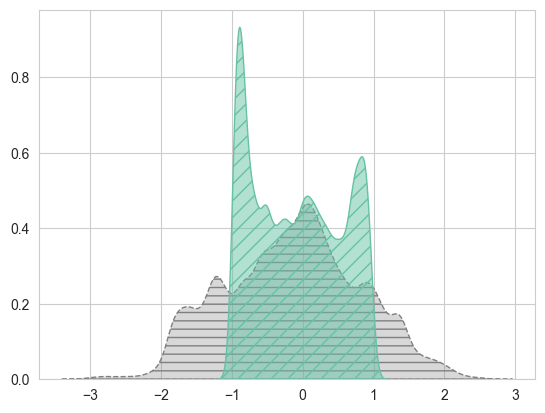

In [7]:

plot_activation(init_point0, X_TS)

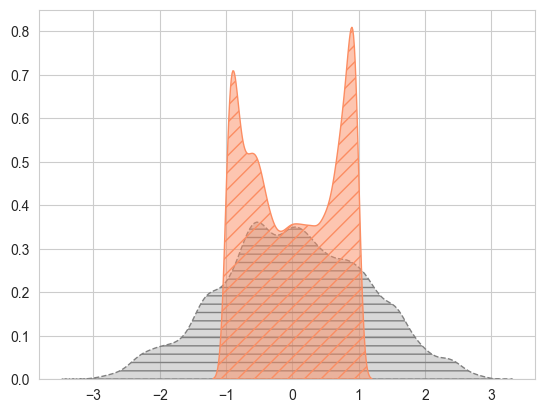

In [8]:
plot_activation(init_point1, X_TS, color=1)

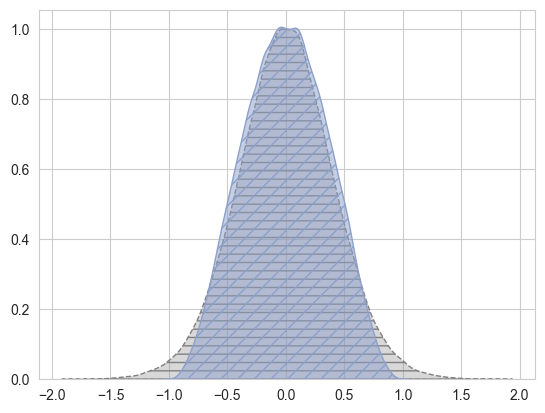

In [9]:
plot_activation(init_point2, X_TS, color=2)


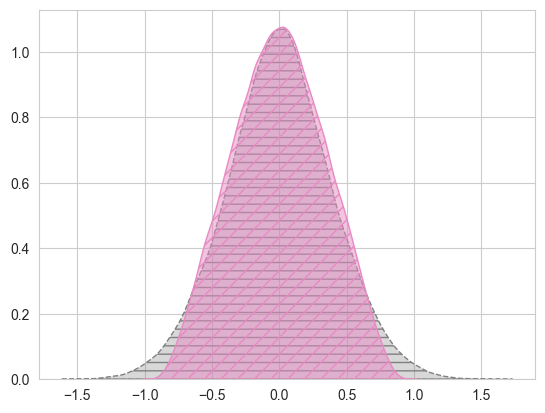

In [10]:
plot_activation(init_point3, X_TS, color=3)


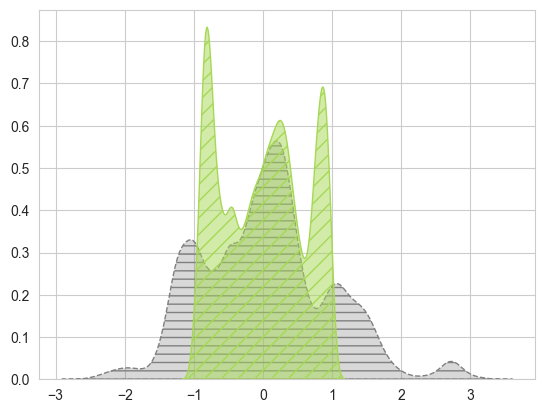

In [11]:
plot_activation(init_point4, X_TS, color=4)


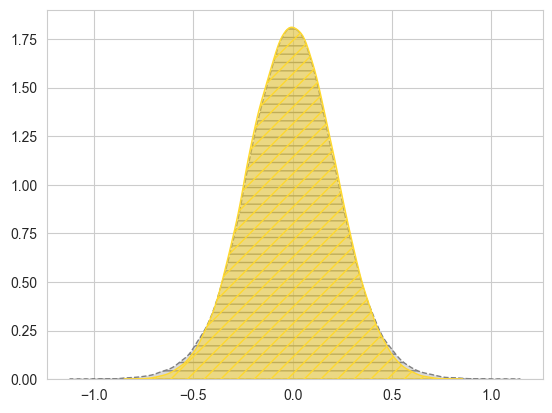

In [12]:
plot_activation(init_point5, X_TS, color=5)
